<a href="https://colab.research.google.com/github/bkkaggle/pytorch-CycleGAN-and-pix2pix/blob/master/CycleGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

aashfhsdbvsnadjvn

### checking install & dependecies

For this implementation of the model, based on the yosemite images, we made chanegs in regard to the normalization used and tweaked various parameters to tabulate the corresponsing results.

In [8]:
#!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

In [2]:
import os
os.chdir('pytorch-CycleGAN-and-pix2pix/')

In [3]:
# !pip install -r requirements.txt

# Datasets

Download one of the official datasets with:

-   `bash ./datasets/download_cyclegan_dataset.sh [apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower]`

Or use your own dataset by creating the appropriate folders and adding in the images.

-   Create a dataset folder under `/dataset` for your dataset.
-   Create subfolders `testA`, `testB`, `trainA`, and `trainB` under your dataset's folder. Place any images you want to transform from a to b (cat2dog) in the `testA` folder, images you want to transform from b to a (dog2cat) in the `testB` folder, and do the same for the `trainA` and `trainB` folders.

In [7]:
!bash ./datasets/download_cyclegan_dataset.sh ukiyoe2photo

Specified [ukiyoe2photo]
for details.

--2020-03-08 19:00:00--  https://people.eecs.berkeley.edu/~taesung_park/CycleGAN/datasets/ukiyoe2photo.zip
Resolving people.eecs.berkeley.edu (people.eecs.berkeley.edu)... 128.32.189.73
Connecting to people.eecs.berkeley.edu (people.eecs.berkeley.edu)|128.32.189.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 292946532 (279M) [application/zip]
Saving to: ‘./datasets/ukiyoe2photo.zip’

./datasets/ukiyoe2p 100%[===================>] 279.38M  24.6MB/s    in 12s     

2020-03-08 19:00:12 (23.8 MB/s) - ‘./datasets/ukiyoe2photo.zip’ saved [292946532/292946532]

Archive:  ./datasets/ukiyoe2photo.zip
   creating: ./datasets/ukiyoe2photo/trainA/
  inflating: ./datasets/ukiyoe2photo/trainA/01159.jpg  
  inflating: ./datasets/ukiyoe2photo/trainA/01144.jpg  
  inflating: ./datasets/ukiyoe2photo/trainA/00883.jpg  
  inflating: ./datasets/ukiyoe2photo/trainA/00985.jpg  
  inflating: ./datasets/ukiyoe2photo/trainA/00311.jpg  
  infla

We download the pretrained model for the same to study the trainign and genreated results:

> Or to add our own pretrained model to `./checkpoints/{NAME}_pretrained/latest_net_G.pt`

In [5]:
!bash ./scripts/download_cyclegan_model.sh style_ukiyoe

Note: available models are apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower
Specified [style_ukiyoe]
for details.

--2020-03-08 18:56:46--  http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/style_ukiyoe.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.189.73
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.189.73|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45575747 (43M)
Saving to: ‘./checkpoints/style_ukiyoe_pretrained/latest_net_G.pth’

./checkpoints/style 100%[===================>]  43.46M  19.2MB/s    in 2.3s    

2020-03-08 18:56:49 (19.2 MB/s) - ‘./checkpoints/style_ukiyoe_pretrained/latest_net_G.pth’ saved [45575747/45575747]



# Training

-   `python train.py --dataroot ./datasets/horse2zebra --name horse2zebra --model cycle_gan`

Change the `--dataroot` and `--name` to your own dataset's path and model's name. Use `--gpu_ids 0,1,..` to train on multiple GPUs and `--batch_size` to change the batch size. I've found that a batch size of 16 fits onto 4 V100s and can finish training an epoch in ~90s.

Once your model has trained, copy over the last checkpoint to a format that the testing model can automatically detect:

Use `cp ./checkpoints/horse2zebra/latest_net_G_A.pth ./checkpoints/horse2zebra/latest_net_G.pth` if you want to transform images from class A to class B and `cp ./checkpoints/horse2zebra/latest_net_G_B.pth ./checkpoints/horse2zebra/latest_net_G.pth` if you want to transform images from class B to class A.


In [9]:
!python train.py --dataroot ./datasets/ukiyoe2photo --name style_ukiyoe --model cycle_gan

----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: ./datasets/ukiyoe2photo       	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: latest                        
              

### Testing details: 

Utilizing the same approach of prior models, we tabulate the results across a html file and these are accesible in results directory.

* We do change the `--dataroot` and `--name` to be consistent with trained model's configuration. ^^

* For the experiments done, we tweaked around with --netG, --norm, --no_dropout to match the generator architecture of the trained model. 

These changed versions and files are saved as ipynb notebooks for perusal and reference.

* The current file has a test dataset in A, B directories for images. In this run I have used ~50 images under each to reduce the amount of data and compare the changes observed in our final images generated.

In [16]:
cp ./checkpoints/style2ukiyoe/latest_net_G_A.pth ./checkpoints/ukiyoe2photo/latest_net_G.pth

In [19]:
!python test.py --dataroot datasets/ukiyoe2photo/testA --name ukiyoe2photo --model test --no_dropout

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: datasets/ukiyoe2photo/testA   	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

### Visualization:

Some of the results generated as shown below.

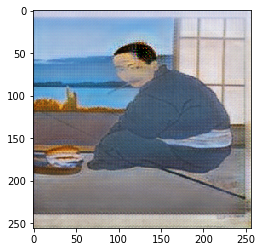

In [21]:
import matplotlib.pyplot as plt

img = plt.imread('./results/ukiyoe2photo/test_latest/images/01325_fake.png')
plt.imshow(img)

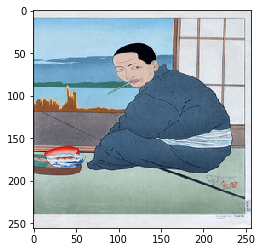

In [23]:
img = plt.imread('./results/ukiyoe2photo/test_latest/images/01325_real.png')
plt.imshow(img)